# Upload model_weights2.h5 file to working directory files then enter kaggle username and key for dataset 
```kaggle Key: a70a5b08c43376f78fda9fa4b9033fa5```

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [5]:
od.download("https://www.kaggle.com/datasets/sumansid/facemask-dataset",data_dir="dataset1")

Skipping, found downloaded files in "dataset1/facemask-dataset" (use force=True to force download)


In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2)

In [13]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/dataset1/facemask-dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (224,224),
                                                   classes={'Mask': 0,'No Mask': 1})


Found 270 images belonging to 2 classes.


In [14]:
from keras.models import load_model
def Build(model_weights_file):

        # load weights into the new model
        model = load_model(model_weights_file)
        return model
model=Build("model_weights2.h5")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

1/1 [==============================] - 5s 5s/step


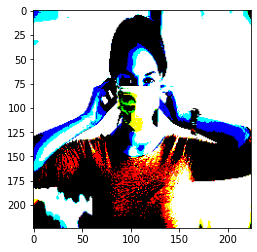

[[0.9601566]]


In [16]:
pred=model.predict(train_dataset[0][0][0].reshape(1,224,224,3))
plt.imshow(train_dataset[0][0][0])
plt.show()
print(pred)

In [17]:
!pip install lime

from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer() 

segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'IDC: mask')

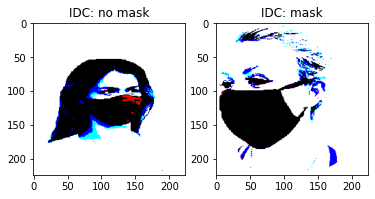

In [18]:
# two testing samples to be explained
plt.subplot(1, 2, 1)

IDC_0_sample_idx = train_dataset[0][0][1]
IDC_0_sample_test = train_dataset[0][0][1]

plt.imshow(IDC_0_sample_test)
plt.title('IDC: {}'.format("no mask"))


plt.subplot(1, 2, 2)

IDC_1_sample_idx = train_dataset[0][0][2]
IDC_1_sample_test =  train_dataset[0][0][2]

plt.imshow(IDC_1_sample_test)
plt.title('IDC: {}'.format("mask"))

# Explaining Model Prediction Once the ConvNet model has been trained, given an original IDC image, the explain_instance() method of the LIME explainer can be called to generate an explanation of the model prediction.

# An explanation of an image prediction consists of a template image and a corresponding mask image. These images can be used to explain a ConvNet model prediction result in different ways.

In [19]:
%%time
'''
Hide color is the color for a superpixel turned OFF. Alternatively, 
if it is NONE, the superpixel will be replaced by the average of its pixels
'''
explanation_0 = explainer.explain_instance(IDC_0_sample_test.astype('double'), classifier_fn = model.predict)
explanation_1 = explainer.explain_instance(IDC_1_sample_test.astype('double'), classifier_fn = model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
CPU times: user 30.6 s, sys: 1.1 s, total: 31.7 s
Wall time: 36.6 s


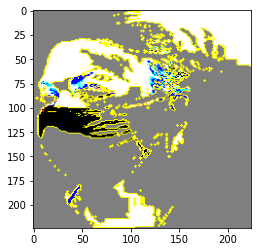

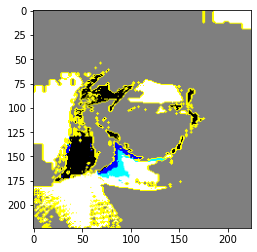

In [20]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=True)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()
temp, mask = explanation_0.get_image_and_mask(explanation_0.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=True)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

explanation 1 top labels[0] =  0


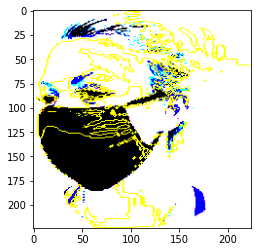

explanation 0 top labels[0] =  0


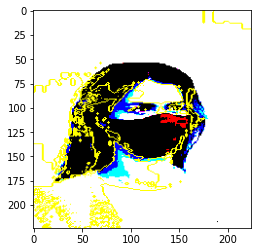

In [21]:
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=False)

print('explanation 1 top labels[0] = ', explanation_1.top_labels[0])
plt.imshow(mark_boundaries(temp, mask))
plt.show()
temp, mask = explanation_0.get_image_and_mask(explanation_0.top_labels[0], 
                                            positive_only=True, 
                                            num_features=20, 
                                            hide_rest=False)

print('explanation 0 top labels[0] = ', explanation_0.top_labels[0])
plt.imshow(mark_boundaries(temp, mask))